In [1]:
from PIL import Image
import numpy as np
import os
from collections import defaultdict
import json
import matplotlib.pyplot as plt
from tqdm import tqdm  # For the progress bar
import time  # for checking run-time

In [2]:
! ls ../data

LICENSE  config_v1.2.json  demo.py  training
README	 config_v2.0.json  testing  validation


In [3]:
data_dir = '../data'
train_images_dir = os.path.join(data_dir, 'training/images')
train_images_dir

'../../mapillary_data/training/images'

In [101]:
def count_label_occurrences_across_images(image_folder, config_file_path, num_images_to_process, class_dist_output_file):
    
    # Load the label configuration file
    with open(config_file_path) as config_file:
        config = json.load(config_file)
    
     # Get the labels section from the config file
    config_labels = config['labels']
    num_config_labels = len(config_labels)
    print(f"Config file has: {num_config_labels} labels")
    ############################################################################

    
    # Get the labels from the training images
    
    label_counts = defaultdict(int)
    
    # Start the timer
    start_time = time.time()

    if num_images_to_process == None:
        image_files = os.listdir(image_folder)
    else:
        n = int(num_images_to_process)
        image_files = os.listdir(image_folder)[0:n]
    
    # Loop through image files with a progress bar
    for image_file in tqdm(image_files, desc="Processing images", unit="image"):
        image_path = os.path.join(image_folder, image_file)
        
        # Load the image as a numpy array
        image = Image.open(image_path)
        image_array = np.array(image)  # assuming images are in .png, .jpg, etc.
        
        # Get the unique labels in the current image
        unique_labels_in_image = np.unique(image_array)

        # Count how many times each unique label appears
        for label in unique_labels_in_image:
            label_counts[int(label)] += 1  # Increment the count for this label ID

    # Sort label counts by label ID
    sorted_label_counts = dict(sorted(label_counts.items()))
    ##############################################################################
    
   

    # Prepare label data for saving as JSON
    label_data = []
    for label_id, count in sorted_label_counts.items():
        label_name = config_labels[label_id]['readable']  
        label_data.append({"label_id": label_id, "label_name": label_name, "label_count": count})
    
    # Save label data as a JSON file
    with open(class_dist_output_file, 'w') as json_output_file:
        json.dump(label_data, json_output_file, indent=4)
    
    # End the timer
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    print(f"Label data has been saved to {class_dist_output_file}")
    print(f"Time taken: {elapsed_time:.2f} seconds")





In [102]:
train_image_label_path = os.path.join(data_dir, "training/v2.0/labels")
# print(len(os.listdir(train_image_label_path)))
image_folder = train_image_label_path

config_file_path = os.path.join(data_dir, 'config_v2.0.json')
# with open(config_file_path) as config_file:
#     config = json.load(config_file)
    
# # Get the labels section from the config file
# config_labels = config['labels']
# print(len(config_labels))

class_dist_output_file = 'class_distribution_file.json'

num_images_to_process = None   



In [103]:
# Run to get class distribution and save to file
count_label_occurrences_across_images(image_folder, config_file_path, num_images_to_process, class_dist_output_file)

Config file has: 124 labels


Processing images: 100%|████████████████████████| 18000/18000 [1:04:08<00:00,  4.68image/s]

Label data has been saved to class_distribution_file.json
Time taken: 3848.84 seconds


There are: 124 labels


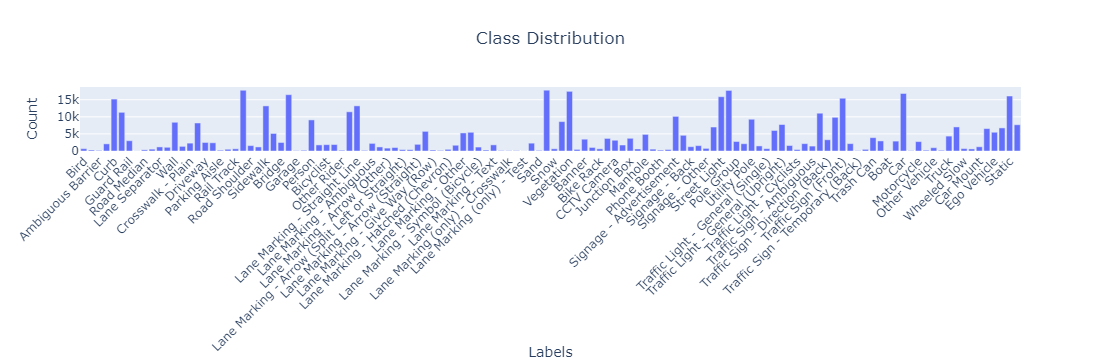

In [104]:
!pip install plotly
import plotly.express as px
def visualize_label_counts_interactive(class_dist_output_file):
    with open(class_dist_output_file, 'r') as file:
        label_data = json.load(file)

    # Extract label names and counts
    label_names = [item["label_name"] for item in label_data]
    label_counts = [item["label_count"] for item in label_data]

    print(f"There are: {len(label_names)} labels")

    # Create the bar chart using Plotly
    fig = px.bar(x=label_names, y=label_counts, labels={'x':'Labels', 'y':'Count'}, title='Class Distribution')

    # Rotate the x labels for better readability
    fig.update_layout(xaxis_tickangle=-45, title_x=0.5)

    
    # Show interactive plot
    fig.show()

visualize_label_counts_interactive(class_dist_output_file)

In [111]:
def visualize_label_counts(class_dist_output_file):

    with open(class_dist_output_file, 'r') as file:
        label_data = json.load(file)

    # Extract label ids, names, and counts
    label_ids = [item["label_id"] for item in label_data]
    label_names = [item["label_name"] for item in label_data]
    label_counts = [item["label_count"] for item in label_data]

    # Set up a larger matplotlib figure
    plt.figure(figsize=(18, 12))  # Adjust figure size for better label legibility

    # Horizontal Bar Plot
    bars = plt.barh(label_names, label_counts, color='skyblue')

    # Set label font size and axis titles
    plt.xlabel('Count', fontsize=16)
    # plt.ylabel('Class Labels', fontsize=16)
    plt.title('Class Distribution Across Images', fontsize=20)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # # Rotate label names for readability, adjust if needed
    # for bar in bars:
    #     plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, f'{bar.get_width():,}', 
    #              va='center', ha='left', fontsize=10)

    # Show the plot with tight layout
    plt.tight_layout()
    plt.show()

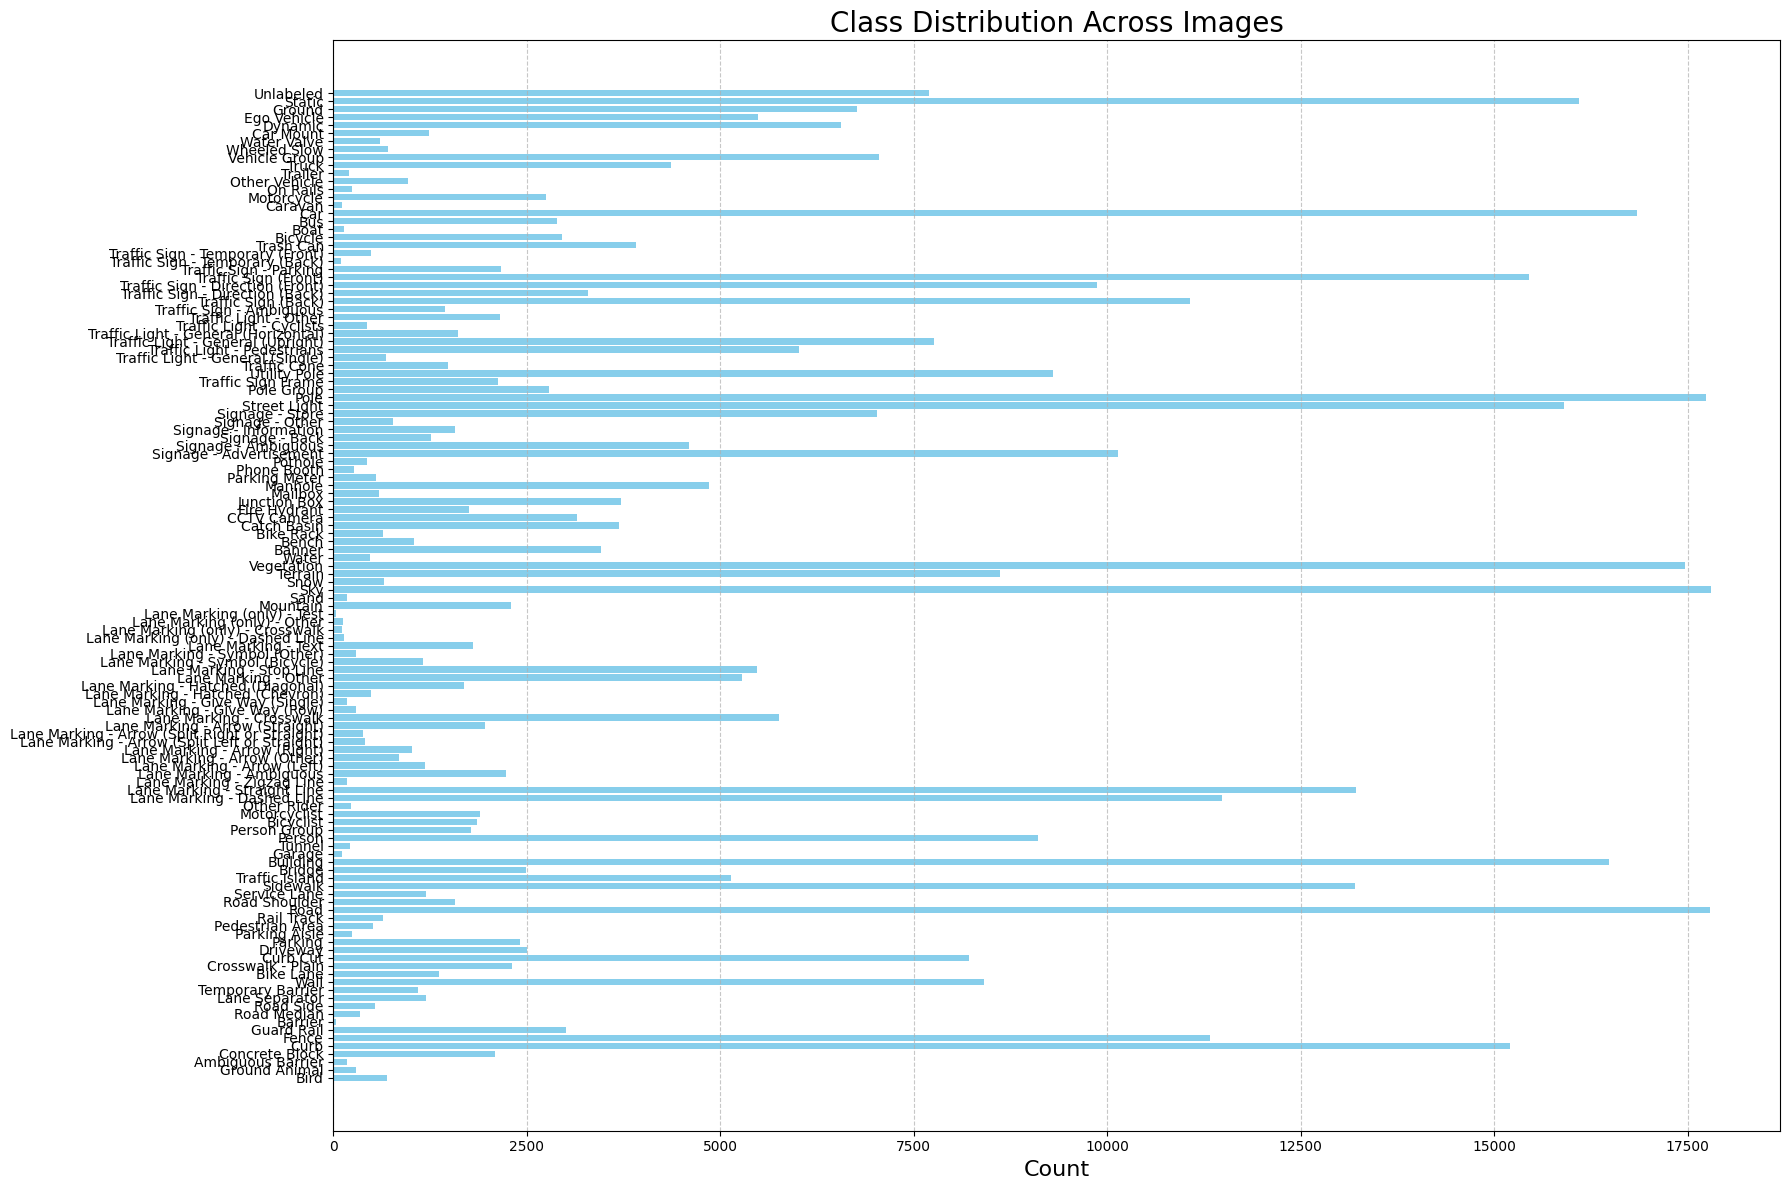

In [112]:
visualize_label_counts(class_dist_output_file)